#LinearRegression
using SKLearn

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np 
import pandas as pd
from scipy.stats import norm

In [ ]:
x=np.linspace(1,100,100)

In [ ]:
y=x*5+4+np.random.normal(10,50,size=len(x))

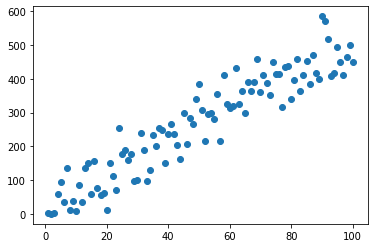

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression(fit_intercept=True)

In [ ]:
xfit=model.fit(x[:,np.newaxis],y)

In [ ]:
xnew=np.linspace(0,100,1000)

In [ ]:
ynew=model.predict(xnew[:,np.newaxis])

In [ ]:
ynew.shape

(1000,)

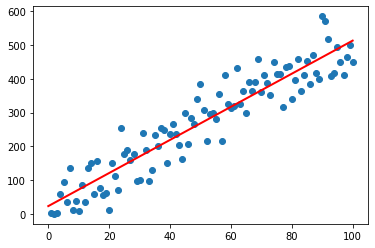

In [ ]:
plt.scatter(x,y)
plt.plot(xnew,ynew,'r',linewidth=2)

HW: calculate the regression residuals and plot the histogram 
Hint: 

plt.hist(residual_values, bins=???, density=True, alpha=0.6, colot='b')

Creating synthetic data sklearn.datasets.samples_generator class
**Linear Regression**

In [ ]:
from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split

Generate the data

In [ ]:
X,y,coeff=make_regression(n_samples=100, n_features=1, n_informative=10, n_targets=1, bias=100.0, effective_rank=None, tail_strength=0.5, noise=10.0, shuffle=True, coef=True, random_state=None)

In [ ]:

X.shape, y.shape, coeff

((100, 1), (100,), array(45.03272198))

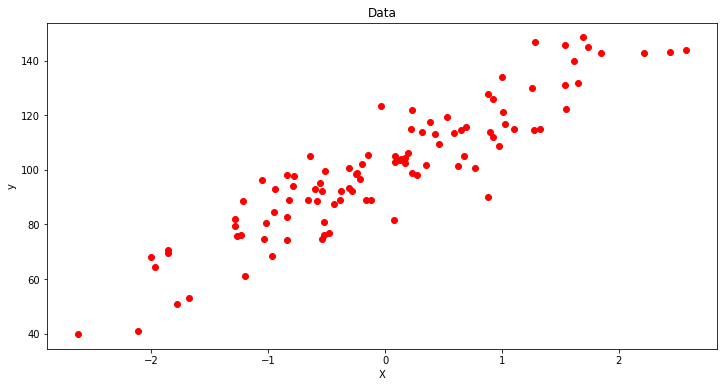

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(X,y,'ro')
plt.title('Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
lm=LinearRegression()

In [ ]:
modelnew=lm.fit(X,y)

In [ ]:
modelnew.intercept_

100.6842431151289

In [ ]:
modelnew.coef_

array([20.01163821])

In [ ]:
ypred=modelnew.intercept_+modelnew.coef_[0]*X

Text(0, 0.5, 'y')

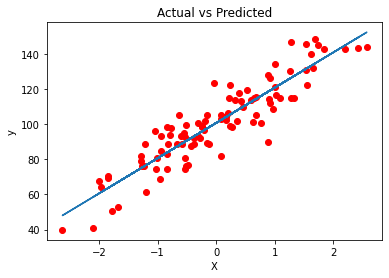

In [ ]:
plt.plot(X,y,'ro')
plt.plot(X,ypred)
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [ ]:
model1=lm.fit(X_train,y_train)

**Cross Validation**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
scores=cross_val_score(model1,X_train,y_train,cv=5)

In [ ]:
scores

array([0.9115683 , 0.79462623, 0.87385665, 0.75681327, 0.76017891])

In [ ]:
scores.mean(), scores.std()

(0.819408673483542, 0.06244757283210776)

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
y_pred.shape

(40,)

In [ ]:
mean_squared_error(y_test,y_pred.flatten())

118.32639693933484

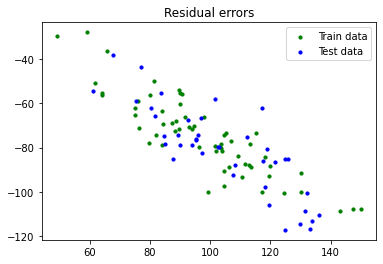

In [ ]:
plt.scatter(model1.predict(X_train),model.predict(X_train)-y_train,color="green",s=10,label='Train data')
plt.scatter(model1.predict(X_test),model.predict(X_test)-y_test,color="blue",s=10,label='Test data')
plt.title("Residual errors")
plt.legend(loc='upper right')

In [ ]:
np.transpose(X)


array([[ 2.21148514, -0.83533158, -0.38544244,  0.53304499, -0.51971244,
         0.34982534,  0.68830832, -0.54006731, -0.11985212, -0.0369651 ,
         1.69427294, -1.2336853 , -0.83723548, -0.96871679, -0.53813071,
         0.92491539,  0.08783913, -0.14949266, -0.30957254, -1.19804881,
         0.77277089, -0.58660589,  0.88057591,  1.2718109 ,  0.23043372,
        -1.03252366,  1.54233542,  0.38265016,  0.65174575, -0.9403824 ,
         1.02170737,  0.13924361,  0.88276518, -0.77540258, -0.51757678,
         1.61856778,  0.12591109,  1.26009458, -1.6763617 ,  1.65037539,
         1.73862842, -0.37413578, -0.66295938, -0.60219826, -0.24728335,
        -1.04938674, -0.16361035,  0.17320222,  0.89667663,  0.1725191 ,
         0.67839629,  1.27921856, -0.78898269, -2.113888  , -1.01871219,
         2.43414568,  1.32356713,  0.58977819,  2.57683163, -0.55473585,
        -0.52503173, -1.21668931, -0.84034091, -0.43855769, -1.77754249,
         0.07911303,  0.23327303, -2.00532612, -1.2

In [ ]:
np.dot(np.transpose(X),y)

array([2280.98254086])

**Normal equation**

In [ ]:
x.shape

(100,)

In [ ]:
y.shape

(100,)

In [ ]:
x_bias=np.ones((100,1))
x_=np.reshape(x,(100,1))
x_=np.append(x_bias,x_,axis=1)

In [ ]:
x_transpose=np.transpose(x_)
x_transpose_dot_x=x_transpose.dot(x_)

In [ ]:
test1=np.linalg.inv(x_transpose_dot_x)

In [ ]:
test2=x_transpose.dot(y)

In [ ]:
thetas=test1.dot(test2)

In [ ]:
thetas

array([ 1.03525772e+02, -5.72146436e-02])

In [ ]:
xfit1=np.linspace(0,100,1000)
yfit1=thetas[0]+xfit1*thetas[1]

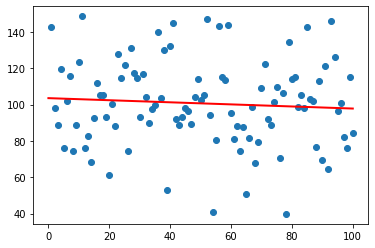

In [ ]:
plt.scatter(x,y)
plt.plot(xfit1,yfit1,'r',linewidth=2)

In [ ]:
import numpy as np 
a=np.linspace(0,100,1000000)
y=np.transpose(a[:,np.newaxis])
a=a[:,np.newaxis]

In [ ]:
a.shape

(10000, 1)

In [ ]:
y.shape

(1, 10000)

In [ ]:
a_dot_y=np.dot(a,y)

In [ ]:
a_dot_y.shape

In [ ]:
test=np.linalg.inv(a_dot_y)